In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
#This function finds the 3-coloring of a graph example defined inside the function
#Input: None
#Returns Ideal Variety solutions, list edges
def findSolution():
    #Define color number as 3, define NumberField and Polynomialring over Q
    k=3
    R.<w> = PolynomialRing(QQ)
    F.<w> = NumberField(w^(2)+ w +1)
    R = PolynomialRing(F,8, names='x', order='degrevlex')
    
    x = R.gens()
    numberOfVertices = len(x)
    
    index = list(range(0, numberOfVertices))
    #Define edges in graphe xample
    edges = [(0,1),(0,4),(0,5), (1,2), (1,3), (1,7), (2,3), (2, 7), (3,4), (3,6), (4,5), (4,6), (5,6), (6,7)]
    
    functions = []
    for i in index:
        functions.append(x[i]^k - 1)
    for edge in edges:
        functions.append(sum([x[edge[0]]^(k-1-m) * x[edge[1]]^m for m in range(0,k)]))
        
    I = Ideal(functions)
    G = I.groebner_basis()
    solutions = I.variety()
    requiredSolution = solutions
    return (requiredSolution, edges)

In [5]:
#This function draws the graph 3-coloring corresponding to given solution and edges.
def plotGraph(obtainedSolution, edges):
    path = '/Users/qsr/Desktop'
    Colors = {
        '1': "red",
        'w': "blue",
        '-w - 1': "yellow",
    }
    
    G = nx.Graph()

    for i in range(1, len(obtainedSolution)+1):
        G.add_node(i)

    for edge in edges:
        G.add_edge(edge[0] + 1, edge[1] +1)
        
    positions = {1:(0,0), 2:(0,6),3:(-6,6), 4:(-5,3), 5:(-3,3), 6:(-3,-2),7:(-5,0),8:(-8,8)}

    

    nodeColors = [Colors[str(val)] for val in obtainedSolution]
    
    options = {
        "font_size": 16,
        "node_size": 500,
        "node_color": nodeColors,
        "edgecolors": "black",
        "linewidths": 2,
        "width": 4,
    }
    nx.draw_networkx(G, positions, **options)

# Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.show()
     
   

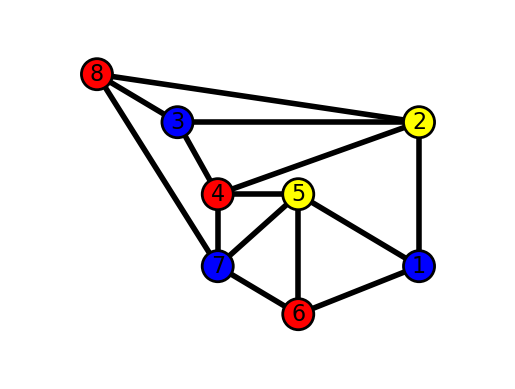

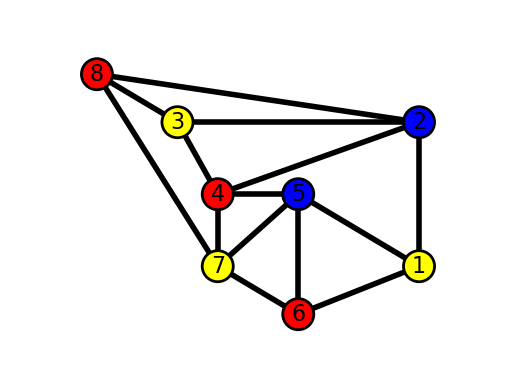

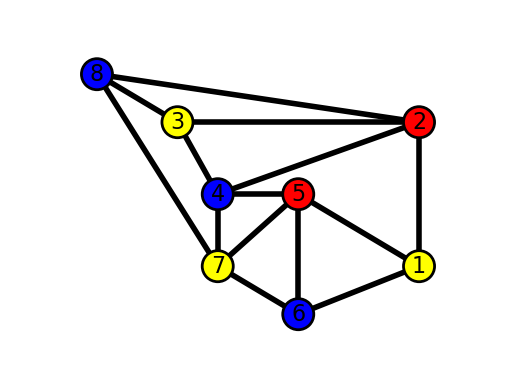

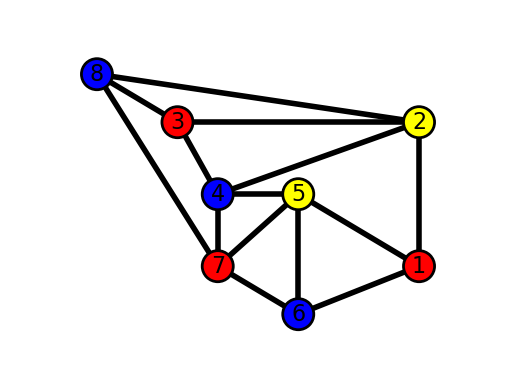

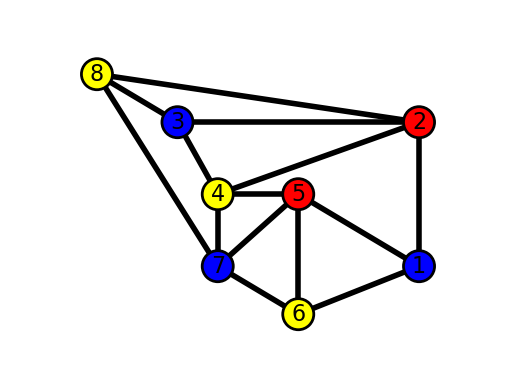

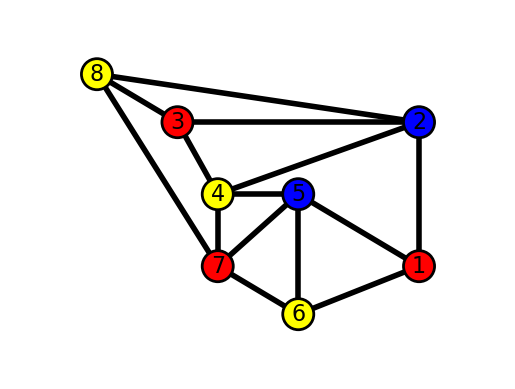

In [6]:
#Plot example graph 3-coloring and the permutations of the example graph coloring, and print corresponding permutation first.
(requiredSolutions, edges) = findSolution()
for solution in requiredSolutions:
    permutation = list(list(solution.values()))[::-1]
    plotGraph(permutation, edges)

In [7]:
#This function plots a graph created based on obtainedSolution and edges in black and white.
def plotGraphBlack(obtainedSolution, edges):
    G = nx.Graph()

    for i in range(1, len(obtainedSolution)+1):
        G.add_node(i)

    for edge in edges:
        G.add_edge(edge[0] + 1, edge[1] +1)
        
    positions = {1:(0,0), 2:(0,6),3:(-6,6), 4:(-5,3), 5:(-3,3), 6:(-3,-2),7:(-5,0),8:(-8,8)}

   
    
    options = {
        "font_size": 16,
        "node_size": 500,
        "node_color": 'white',
        "edgecolors": "black",
        "linewidths": 2,
        "width": 4,
    }
    nx.draw_networkx(G, positions, **options)

# Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.show()

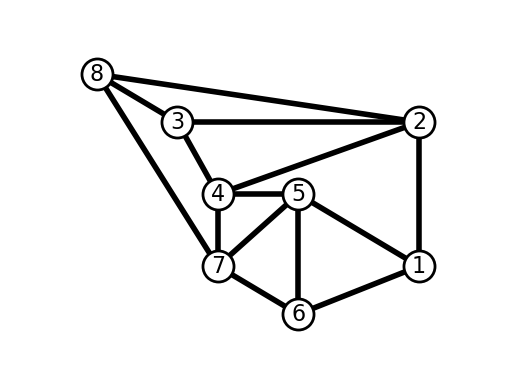

In [8]:
#Plot example graph in black and white
(requiredSolutions, edges) = findSolution()
requiredSolution = list(list(requiredSolutions)[0].values())[::-1]
plotGraphBlack(requiredSolution, edges)